In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

chuy uy
kodiak us
taganak ph
santa ana pe
rikitea pf
dalvik is
kadykchan ru
cape town za
dikson ru
longyearbyen sj
nikolskoye ru
mount isa au
vila franca do campo pt
henties bay na
pisco pe
huaraz pe
new norfolk au
oytal kz
adeje es
novo aripuana br
ushuaia ar
yellowknife ca
saint-augustin ca
new norfolk au
inyonga tz
mwinilunga zm
illoqqortoormiut gl
barrow us
amderma ru
ferrol es
provideniya ru
ushuaia ar
tuatapere nz
busselton au
dikson ru
taltal cl
hovd mn
punta arenas cl
lebu cl
cooma au
nguru ng
olafsvik is
bluff nz
boa vista br
bo phloi th
kapaa us
narsaq gl
airai pw
georgetown sh
avarua ck
karkaralinsk kz
hobart au
ushuaia ar
nchelenge zm
bredasdorp za
codrington ag
abonnema ng
barra dos coqueiros br
fortuna us
canguaretama br
albany au
rikitea pf
belushya guba ru
ponta do sol cv
busselton au
puerto ayora ec
butaritari ki
sapernoye ru
barrow us
kapaa us
bluff nz
rikitea pf
lavrentiya ru
ushuaia ar
kaitangata nz
georgetown sh
prachuap khiri khan th
batemans bay au
jamestown sh
m

avarua ck
iqaluit ca
gweta bw
yellowknife ca
tasiilaq gl
bac lieu vn
itarema br
nikolskoye ru
puerto ayora ec
leibnitz at
san cristobal ec
cape town za
bluff nz
atuona pf
pangnirtung ca
dingle ie
broken hill au
hermanus za
kapaa us
upata ve
arraial do cabo br
praya id
hobart au
ushuaia ar
tadine nc
flinders au
tautira pf
kavieng pg
minab ir
port lincoln au
kaitangata nz
kruisfontein za
busselton au
walvis bay na
beringovskiy ru
mahon es
lagoa pt
kuching my
jamestown sh
punta arenas cl
butaritari ki
punta arenas cl
harper lr
kapaa us
hobart au
rikitea pf
kapaa us
leh in
tuktoyaktuk ca
rikitea pf
ushuaia ar
dhaulpur in
ati td
lebu cl
mataura pf
sompeta in
fuerte olimpo py
vaini to
rikitea pf
pisco pe
jamestown sh
chokurdakh ru
ushuaia ar
dikson ru
port blair in
hamilton bm
bluff nz
boa vista br
anaconda us
iqaluit ca
kodiak us
amazar ru
arrifes pt
yellowknife ca
cidreira br
bandar-e torkaman ir
tautira pf
busselton au
nuuk gl
chuy uy
punta arenas cl
maraa br
jimenez mx
barrow us
tezu in


taolanaro mg
mataura pf
yellowknife ca
khatanga ru
rikitea pf
banda aceh id
tiksi ru
port alfred za
pirovskoye ru
riyadh sa
puerto ayora ec
khatanga ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# import the datetime module from the datetime library.
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | taganak
Processing Record 4 of Set 1 | santa ana
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | dalvik
Processing Record 7 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | vila franca do campo
Processing Record 14 of Set 1 | henties bay
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | huaraz
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | oytal
Processing Record 19 of Set 1 | adeje
Processing Record 20 of Set 1 | novo aripuana
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | yellowknife
Process

Processing Record 37 of Set 4 | cabedelo
Processing Record 38 of Set 4 | unterseen
Processing Record 39 of Set 4 | mitchell
Processing Record 40 of Set 4 | aranos
Processing Record 41 of Set 4 | hudson bay
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | plettenberg bay
Processing Record 47 of Set 4 | guzelyurt
Processing Record 48 of Set 4 | shelburne
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | moindou
Processing Record 1 of Set 5 | muros
Processing Record 2 of Set 5 | phangnga
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | colac
Processing Record 5 of Set 5 | vryburg
Processing Record 6 of Set 5 | altay
Processing Record 7 of Set 5 | ambilobe
Processing Record 8 of Set 5 | saskylakh
Processing Record 9 

Processing Record 26 of Set 8 | sug-aksy
City not found. Skipping...
Processing Record 27 of Set 8 | pietarsaari
Processing Record 28 of Set 8 | lodja
Processing Record 29 of Set 8 | marystown
Processing Record 30 of Set 8 | haapu
City not found. Skipping...
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | de aar
Processing Record 33 of Set 8 | gweta
Processing Record 34 of Set 8 | tasiilaq
Processing Record 35 of Set 8 | bac lieu
Processing Record 36 of Set 8 | itarema
Processing Record 37 of Set 8 | leibnitz
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | broken hill
Processing Record 40 of Set 8 | upata
Processing Record 41 of Set 8 | praya
Processing Record 42 of Set 8 | tadine
Processing Record 43 of Set 8 | flinders
Processing Record 44 of Set 8 | tautira
Processing Record 45 of Set 8 | minab
Processing Record 46 of Set 8 | walvis bay
Processing Record 47 of Set 8 | mahon
Processing Record 48 of Set 8 | kuching
Processing 

Processing Record 17 of Set 12 | fairbanks
Processing Record 18 of Set 12 | lodwar
Processing Record 19 of Set 12 | roald
Processing Record 20 of Set 12 | praia
Processing Record 21 of Set 12 | tokur
Processing Record 22 of Set 12 | stokmarknes
Processing Record 23 of Set 12 | cambridge
Processing Record 24 of Set 12 | inuvik
Processing Record 25 of Set 12 | necochea
Processing Record 26 of Set 12 | tehachapi
Processing Record 27 of Set 12 | poya
Processing Record 28 of Set 12 | ribeira brava
Processing Record 29 of Set 12 | marzuq
Processing Record 30 of Set 12 | paso de los toros
Processing Record 31 of Set 12 | havre-saint-pierre
Processing Record 32 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 33 of Set 12 | christchurch
Processing Record 34 of Set 12 | york
Processing Record 35 of Set 12 | jacareacanga
Processing Record 36 of Set 12 | mahibadhoo
Processing Record 37 of Set 12 | merauke
Processing Record 38 of Set 12 | maningrida
Processing Record 39 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,54.43,64,0,3.78,UY,2022-04-05 02:39:19
1,Kodiak,57.7900,-152.4072,38.71,48,75,11.50,US,2022-04-05 02:39:49
2,Taganak,6.0833,118.3000,78.94,75,100,3.80,PH,2022-04-05 02:39:49
3,Santa Ana,33.7456,-117.8678,70.32,71,40,5.75,US,2022-04-05 02:38:46
4,Rikitea,-23.1203,-134.9692,78.51,64,51,12.50,PF,2022-04-05 02:34:34
5,Dalvik,65.9702,-18.5286,24.73,95,100,5.08,IS,2022-04-05 02:39:50
6,Cape Town,-33.9258,18.4232,60.28,90,75,10.36,ZA,2022-04-05 02:30:01
7,Dikson,73.5069,80.5464,4.87,81,50,16.06,RU,2022-04-05 02:39:50
8,Longyearbyen,78.2186,15.6401,10.24,61,20,14.97,SJ,2022-04-05 02:39:23
9,Nikolskoye,59.7035,30.7861,36.88,96,100,15.01,RU,2022-04-05 02:39:51


In [15]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-04-05 02:39:19,-33.6971,-53.4616,54.43,64,0,3.78
1,Kodiak,US,2022-04-05 02:39:49,57.7900,-152.4072,38.71,48,75,11.50
2,Taganak,PH,2022-04-05 02:39:49,6.0833,118.3000,78.94,75,100,3.80
3,Santa Ana,US,2022-04-05 02:38:46,33.7456,-117.8678,70.32,71,40,5.75
4,Rikitea,PF,2022-04-05 02:34:34,-23.1203,-134.9692,78.51,64,51,12.50
...,...,...,...,...,...,...,...,...,...
578,Nome,US,2022-04-05 02:54:04,64.5011,-165.4064,7.56,72,13,8.86
579,Trinidad,BO,2022-04-05 02:58:17,-14.8333,-64.9000,73.15,92,55,0.09
580,Marshfield,US,2022-04-05 02:58:18,44.6689,-90.1718,35.19,96,70,0.87
581,Banda Aceh,ID,2022-04-05 02:58:18,5.5577,95.3222,82.99,69,100,2.24


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

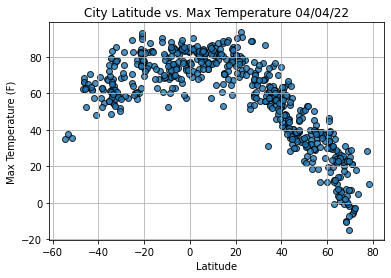

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

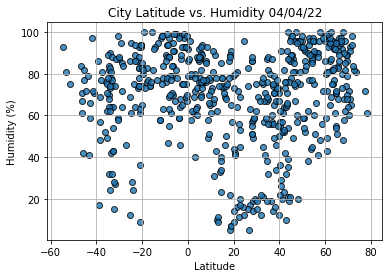

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

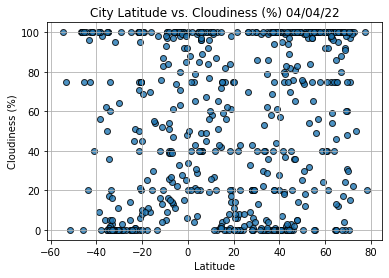

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

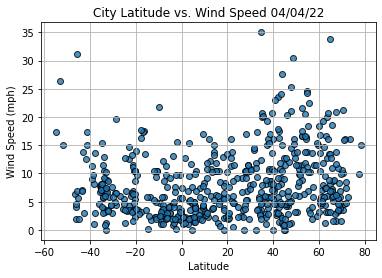

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()